# Import module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
import spacy
import string
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from pandarallel import pandarallel
import time
import pickle

# Data Exploration

In [2]:
import pandas as pd

def load_csv(csv_file):
    return pd.read_csv(csv_file)

job_data = load_csv("seek_australia.csv")

In [3]:
job_data.head()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


In [5]:
city_job_dict = dict()

for each, every in zip(job_data['city'], job_data['category']):
    if each not in city_job_dict:
        city_job_dict[each] = dict()
    if every not in city_job_dict[each]:
        city_job_dict[each][every] = 1
    else:
        city_job_dict[each][every] += 1

#city_job_dict

## Visualise the frequency of job categories

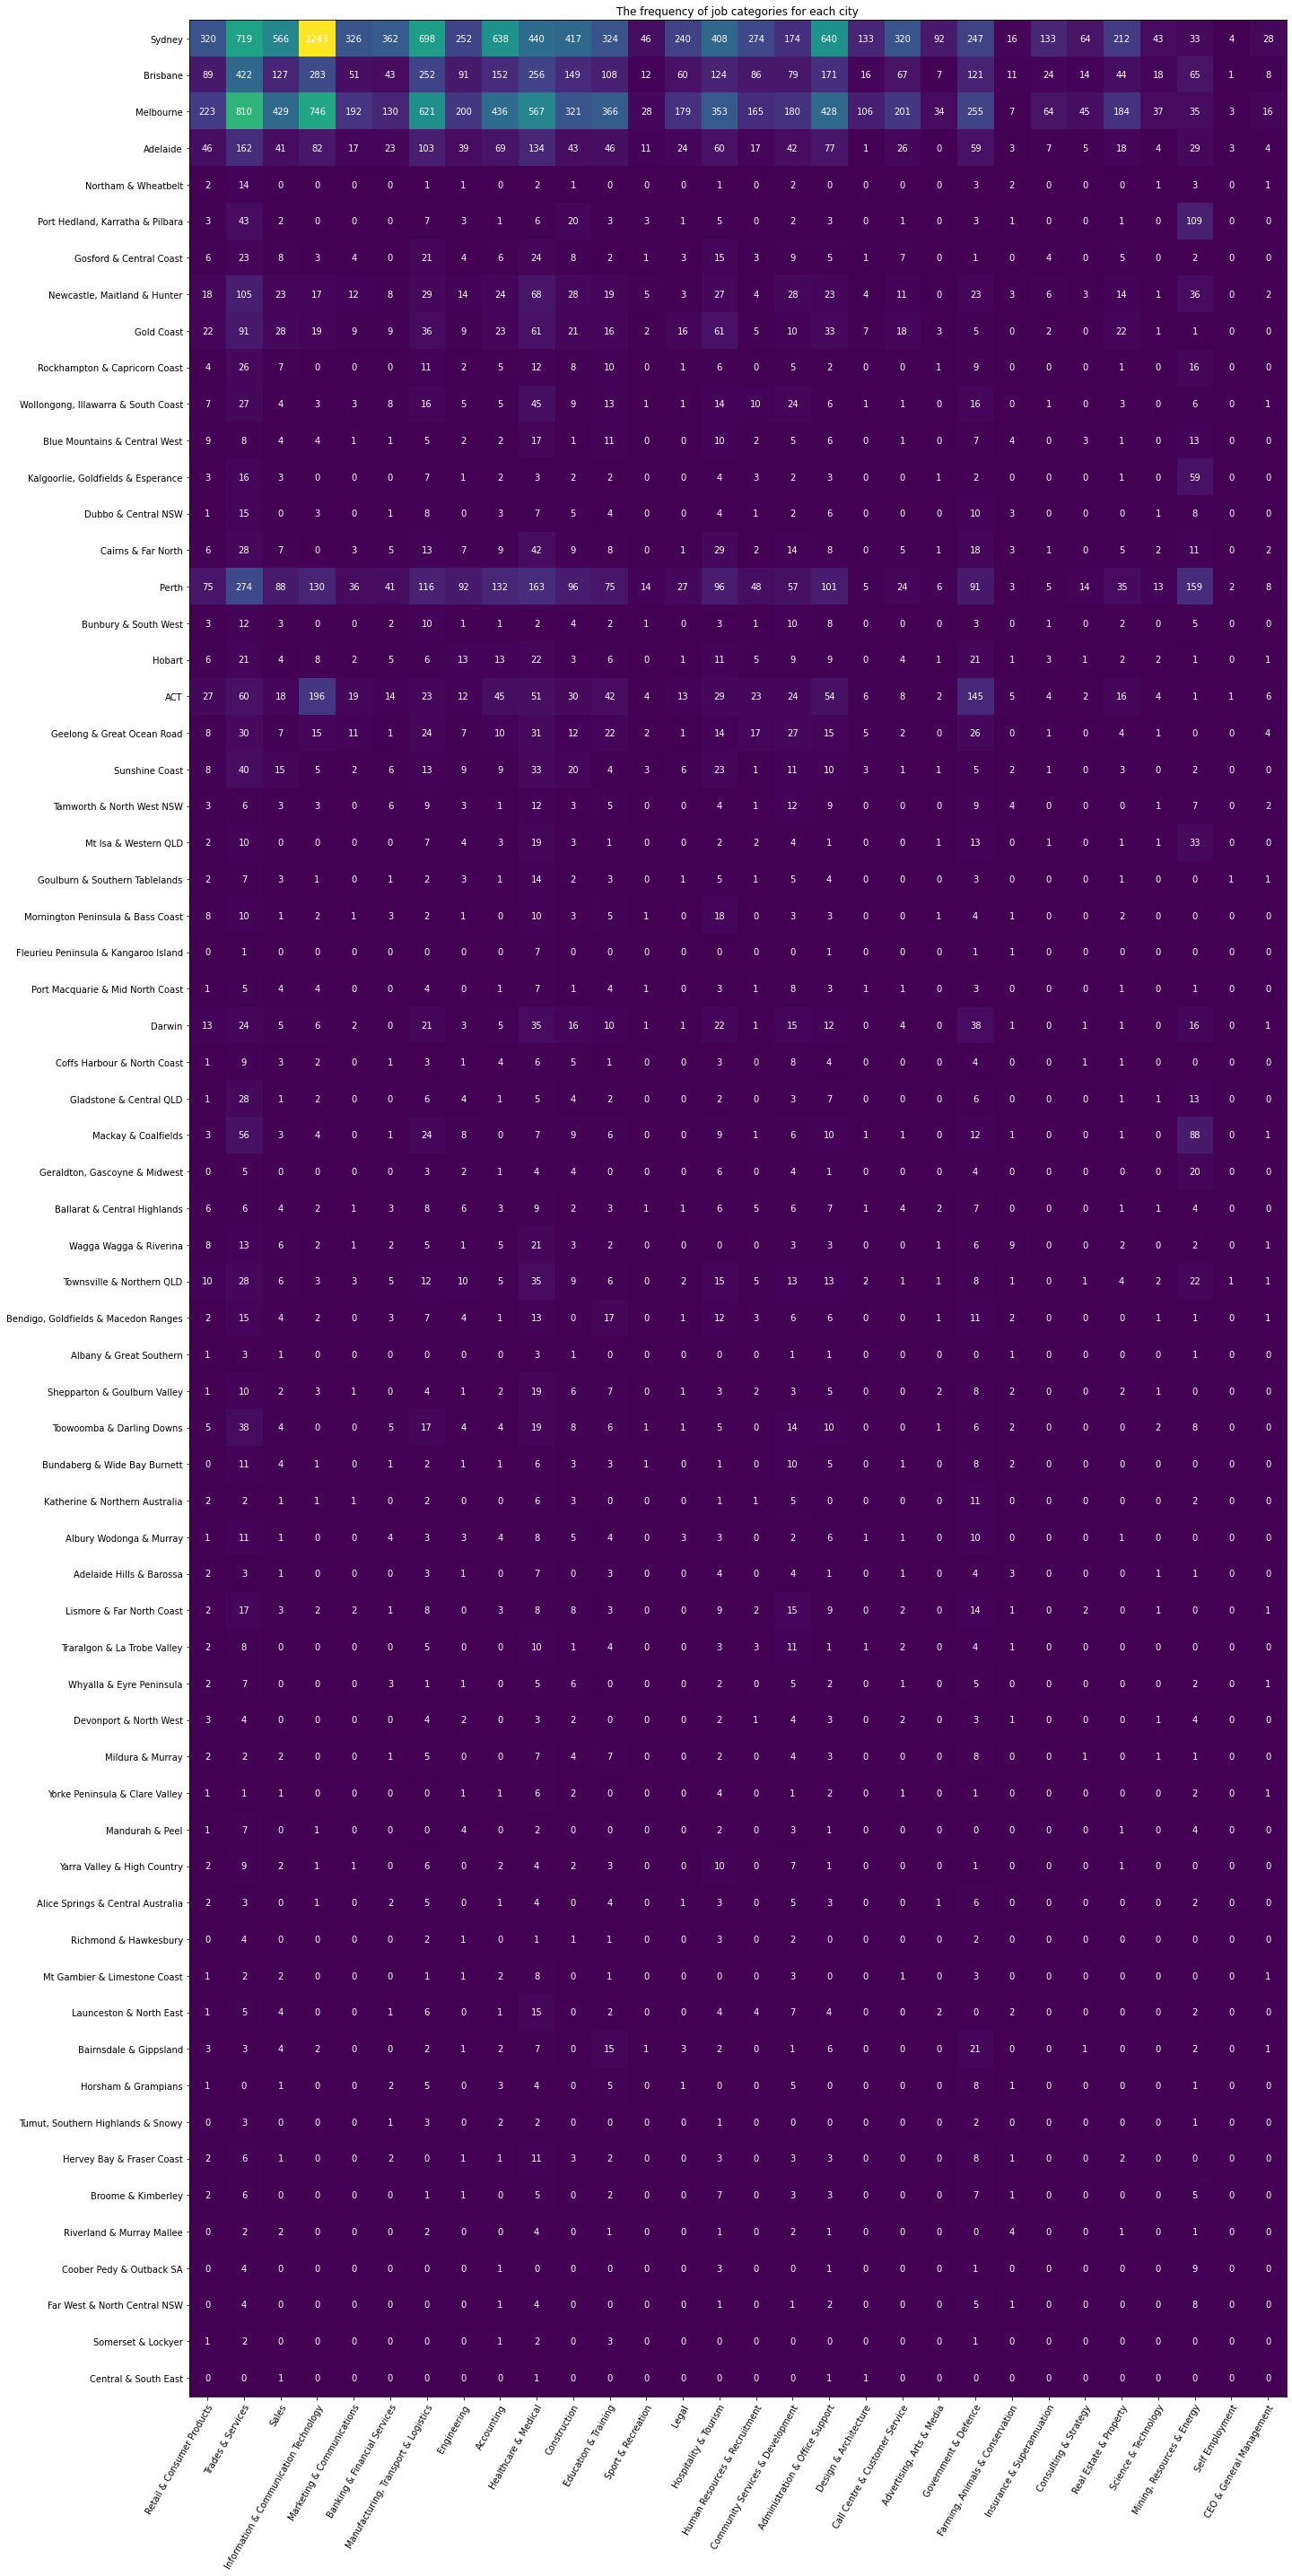

In [41]:
# A new plot using heat map

import matplotlib.pyplot as plt
import numpy as np

#print(city_job_dict)

plot_row = list(city_job_dict.keys())
#print(plot_row)

plot_column = []

for each in plot_row:
    for every in city_job_dict[each]:
        if every not in plot_column:
            plot_column.append(every)
            
#print(plot_column)

count_category = []
for each in plot_row:
    row_list = []
    for every in plot_column:
        try:
            row_list.append(city_job_dict[each][every])
        except:
            row_list.append(0)
    count_category.append(row_list)
    
#print(count_category)

count_category = np.array(count_category)

fig, ax = plt.subplots(figsize=(50, 40))
im = ax.imshow(count_category)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(plot_column)), labels=plot_column)
ax.set_yticks(np.arange(len(plot_row)), labels=plot_row)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(plot_row)):
    for j in range(len(plot_column)):
        text = ax.text(j, i, count_category[i, j],
                       ha="center", va="center", color="w")

ax.set_title("The frequency of job categories for each city")
fig.tight_layout()
plt.savefig("output.jpg")
plt.show()

In [17]:
city_job_dict

{'Sydney': {'Retail & Consumer Products': 320,
  'Trades & Services': 719,
  'Sales': 566,
  'Information & Communication Technology': 1243,
  'Marketing & Communications': 326,
  'Banking & Financial Services': 362,
  'Manufacturing, Transport & Logistics': 698,
  'Engineering': 252,
  'Accounting': 638,
  'Healthcare & Medical': 440,
  'Construction': 417,
  'Education & Training': 324,
  'Sport & Recreation': 46,
  'Legal': 240,
  'Hospitality & Tourism': 408,
  'Human Resources & Recruitment': 274,
  'Community Services & Development': 174,
  'Administration & Office Support': 640,
  'Design & Architecture': 133,
  'Call Centre & Customer Service': 320,
  'Advertising, Arts & Media': 92,
  'Government & Defence': 247,
  'Farming, Animals & Conservation': 16,
  'Insurance & Superannuation': 133,
  'Consulting & Strategy': 64,
  'Real Estate & Property': 212,
  'Science & Technology': 43,
  'Mining, Resources & Energy': 33,
  'Self Employment': 4,
  'CEO & General Management': 28},
 

## Visualise the Word Frequency

In [9]:
job_list = []

for each in list(city_job_dict.keys()):
    for key, number in zip(city_job_dict[each].keys(), city_job_dict[each].values()):
        job_list.extend([key] * number)

word_dict = dict()

for each in range(len(job_list)):
    job_list[each] = job_list[each].replace('&', '').replace(',', '')
    list_split = job_list[each].split(' ')
    for every in list_split:
        if every != '':
            if every not in word_dict:
                word_dict[every] = 1
            else:
                word_dict[every] += 1
        
#job_list
#word_dict

[Text(0, 0, '4986'),
 Text(0, 0, '3346'),
 Text(0, 0, '2944'),
 Text(0, 0, '2802'),
 Text(0, 0, '2802'),
 Text(0, 0, '2371'),
 Text(0, 0, '2371'),
 Text(0, 0, '2220'),
 Text(0, 0, '2220'),
 Text(0, 0, '2220'),
 Text(0, 0, '1766'),
 Text(0, 0, '1766'),
 Text(0, 0, '1766'),
 Text(0, 0, '1648'),
 Text(0, 0, '1557'),
 Text(0, 0, '1483'),
 Text(0, 0, '1483'),
 Text(0, 0, '1464'),
 Text(0, 0, '1346'),
 Text(0, 0, '1346'),
 Text(0, 0, '1326'),
 Text(0, 0, '1224'),
 Text(0, 0, '1224'),
 Text(0, 0, '986'),
 Text(0, 0, '986'),
 Text(0, 0, '986'),
 Text(0, 0, '933'),
 Text(0, 0, '933'),
 Text(0, 0, '857'),
 Text(0, 0, '857'),
 Text(0, 0, '837'),
 Text(0, 0, '720'),
 Text(0, 0, '720'),
 Text(0, 0, '720'),
 Text(0, 0, '720'),
 Text(0, 0, '707'),
 Text(0, 0, '707'),
 Text(0, 0, '701'),
 Text(0, 0, '701'),
 Text(0, 0, '700'),
 Text(0, 0, '700'),
 Text(0, 0, '597'),
 Text(0, 0, '597'),
 Text(0, 0, '597'),
 Text(0, 0, '593'),
 Text(0, 0, '296'),
 Text(0, 0, '296'),
 Text(0, 0, '258'),
 Text(0, 0, '258'

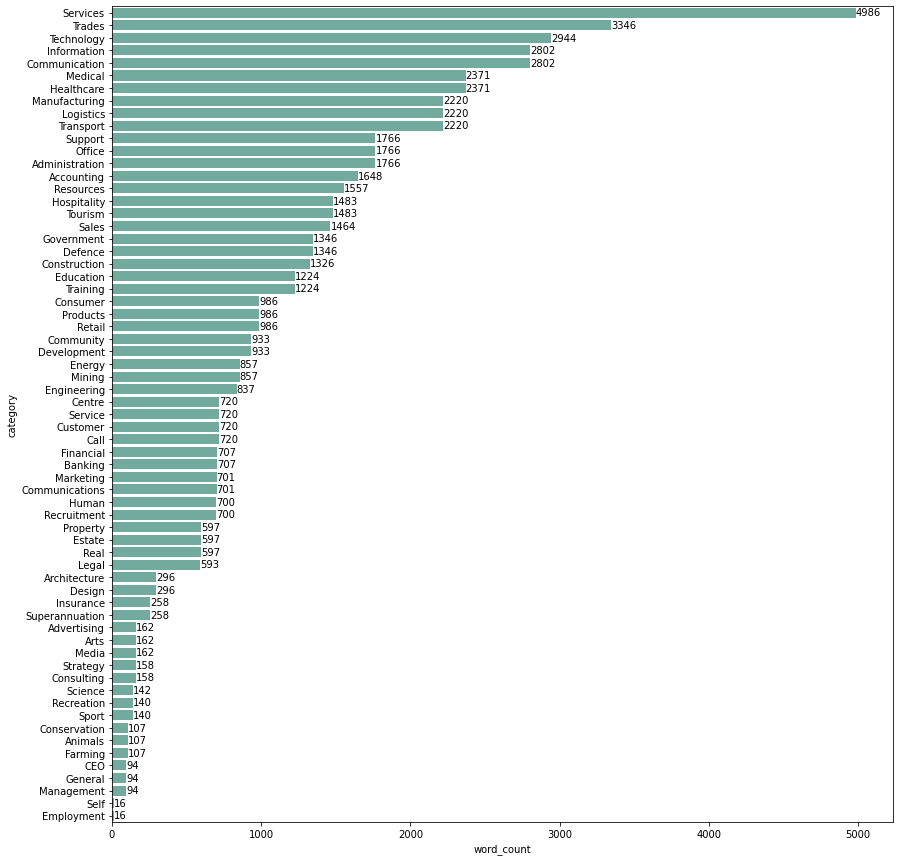

In [10]:
import seaborn as sns

df = pd.DataFrame({
    'category': word_dict.keys(),
    'word_count': word_dict.values()
})

#df

# Set the figure size
plt.figure(figsize=(14, 15))

# Reorder this data frame
df = df.sort_values(['word_count'], ascending=False).reset_index(drop=True)

# Make a barplot
plot = sns.barplot(
    x="word_count", 
    y="category", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

plot.bar_label(plot.containers[0])



# Data Pre-processing

## Clean the data

In [4]:
# try to remove the broken characters

for each in ['š', 'ª', 'º', 'Ÿ', 'µ', 'ˆ', 'œ', 'é', 'è', 'ï', 'Š', 'â', 'ç', 'æ', 'å', 'ä', 'ð', 'Ã', 'Â', 'Å', 'Ä', '®', '€', '™', '\xa0', '\d+']:
    try:
        job_data['job_description_clean'] = job_data['job_description_clean'].replace({each:''}, regex=True)
    except:
        job_data['job_description_clean'] = job_data['job_description'].replace({each:''}, regex=True)

## Tokenize

In [5]:
nltk.download('punkt') # Sentence Tokenize
nltk.download('averaged_perceptron_tagger') # POS Tagging
nltk.download('maxent_ne_chunker') # Named Entity Chunking
nltk.download('words') # Word Tokenize

def tokenized(texts):
    '''A function to tokenize each job description'''
    description_token_list = []
    try:
        sentences = nltk.sent_tokenize(texts)
        for sentence in sentences:
            words = nltk.word_tokenize(sentence)
            description_token_list.extend(words)
    except:
        return []

            
    return description_token_list

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhanghanlin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/zhanghanlin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/zhanghanlin/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/zhanghanlin/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
# have a quick look the performance of the function

print(tokenized(job_data['job_description_clean'][0]))

['Have', 'you', 'had', 'years', 'experience', 'in', 'fresh', 'produce', 'that', 'wants', 'to', 'manage', 'their', 'own', 'store', 'for', 'a', 'family', 'owned', 'Australian', 'company', 'that', 'is', 'passionate', 'about', 'food', '.', 'We', 'are', 'looking', 'for', ':', 'Must', 'have', '+', 'years', 'in', 'the', 'fresh', 'food', 'business', 'and', 'have', 'the', 'passion', 'for', 'the', 'role', '.', 'Current', 'IC', 'looking', 'to', 'progress', 'with', 'training', 'into', 'Store', 'manager', 'role', '.', 'Excellent', 'customer', 'service', 'and', 'communication', 'skills', 'Be', 'hands', 'on', 'and', 'have', 'a', 'can', 'do', 'attitude', 'Be', 'into', 'the', 'fresh', 'food', 'business', 'and', 'have', 'the', 'passion', 'for', 'the', 'role', 'Hardworking', ',', 'ambitious', 'and', 'competitive', 'people', 'who', 'are', 'passionate', 'about', 'good', 'food', '.', 'Are', 'able', 'to', 'maximise', 'the', 'financial', 'return', 'in', 'their', 'market', ',', 'ensuring', 'it', 'meets', 'sale

In [7]:
#job_data['tokenized'] = job_data['job_description_clean'].apply(tokenized)

In [ ]:
#job_data.head()

In [7]:
pandarallel.initialize(progress_bar=True)
job_data['tokenized'] = job_data['job_description_clean'].parallel_apply(tokenized)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [8]:
# have a look what nah blocks become to

job_data['tokenized'][80:90]

80    [What, 's, in, it, for, you, ?, Working, in, t...
81    [About, the, business, Ultra-Lift, Pty, Ltd, i...
82    [The, Company, We, are, currently, working, wi...
83    [Programmed, SKILLED, is, a, workforce, servic...
84    [About, MercyCare, MercyCare, is, a, leading, ...
85    [anzukis, an, education, services, company, th...
86                                                   []
87    [A, highly, regarded, ,, successful, and, pres...
88    [Immediate, start, for, the, right, applicant,...
89    [Executive, Level, $, ,, -, $, ,, (, plus, sup...
Name: tokenized, dtype: object

In [9]:
job_data.head()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url,job_description_clean,tokenized
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382,Have you had years experience in fresh produ...,"[Have, you, had, years, experience, in, fresh,..."
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272,The Opportunity: The Client Solution Analyst ...,"[The, Opportunity, :, The, Client, Solution, A..."
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270,An innovative business development role for a...,"[An, innovative, business, development, role, ..."
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203,About the role: We are seeking an Automotive W...,"[About, the, role, :, We, are, seeking, an, Au..."
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578,Early starts and weekend shifts. No experienc...,"[Early, starts, and, weekend, shifts, ., No, e..."


## Stemming

In [10]:
def stemming(text_list):
    '''A function to get the stem of the given string(for each word in text). It will show
    the freq of the word after stem with tuple format.'''
    if len(text_list):
        #the stemmer requires a language parameter
        snow_stemmer = SnowballStemmer(language='english')
        stem_words = []
        stem_words = [snow_stemmer.stem(each) for each in text_list]
        
        #print(len(stem_words))

        return stem_words
    else:
        return []
#stemming("I have a pen. I have an apple. Emmm, apple pen.".split(' '))


In [ ]:
#job_data['stem'] = job_data['tokenized'].apply(stemming)

In [127]:
# have a quick look the empty list (nah block)

#job_data['stem'][80:90]

80    [what, 's, in, it, for, you, ?, work, in, the,...
81    [about, the, busi, ultra-lift, pti, ltd, is, a...
82    [the, compani, we, are, current, work, with, a...
83    [program, skill, is, a, workforc, servic, comp...
84    [about, mercycar, mercycar, is, a, lead, catho...
85    [anzuki, an, educ, servic, compani, that, have...
86                                                   []
87    [a, high, regard, ,, success, and, prestigi, i...
88    [immedi, start, for, the, right, applic, !, !,...
89    [execut, level, $, ,, -, $, ,, (, plus, super,...
Name: stem, dtype: object

In [11]:
pandarallel.initialize(progress_bar=True)
job_data['stem'] = job_data['tokenized'].parallel_apply(stemming)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [12]:
# have a quick look the empty list (nah block)

job_data['stem'][80:90]

80    [what, 's, in, it, for, you, ?, work, in, the,...
81    [about, the, busi, ultra-lift, pti, ltd, is, a...
82    [the, compani, we, are, current, work, with, a...
83    [program, skill, is, a, workforc, servic, comp...
84    [about, mercycar, mercycar, is, a, lead, catho...
85    [anzuki, an, educ, servic, compani, that, have...
86                                                   []
87    [a, high, regard, ,, success, and, prestigi, i...
88    [immedi, start, for, the, right, applic, !, !,...
89    [execut, level, $, ,, -, $, ,, (, plus, super,...
Name: stem, dtype: object

In [23]:
job_data.head()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url,job_description_clean,tokenized,stem
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382,Have you had years experience in fresh produ...,"[Have, you, had, years, experience, in, fresh,...","[have, you, had, year, experi, in, fresh, prod..."
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272,The Opportunity: The Client Solution Analyst ...,"[The, Opportunity, :, The, Client, Solution, A...","[the, opportun, :, the, client, solut, analyst..."
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270,An innovative business development role for a...,"[An, innovative, business, development, role, ...","[an, innov, busi, develop, role, for, an, awar..."
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203,About the role: We are seeking an Automotive W...,"[About, the, role, :, We, are, seeking, an, Au...","[about, the, role, :, we, are, seek, an, autom..."
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578,Early starts and weekend shifts. No experienc...,"[Early, starts, and, weekend, shifts, ., No, e...","[earli, start, and, weekend, shift, ., no, exp..."


## Lemmatize

In [29]:
nlp = spacy.load('en_core_web_sm')

def lemmatize(text_list):
    '''A function to get the lemmatize of the given string(for each word in text). It will 
    show the freq of the word after stem with tuple format.'''
    text = ' '.join(word for word in text_list)
    doc = nlp(text)
    
    lemma_words = []
    
    for each in doc:
        lemma_words.append(each.lemma_)
    return lemma_words
#lemmatize("I have a pen. I have an apple. Emmm, apple pen.".split(' '))


In [24]:
#job_data['lemma'] = job_data['tokenized'].apply(lemmatize)

In [30]:
pandarallel.initialize(progress_bar=True)
job_data['lemma'] = job_data['tokenized'].parallel_apply(lemmatize)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [31]:
job_data['lemma'][80:90]

80    [what, be, in, it, for, you, ?, work, in, the,...
81    [about, the, business, Ultra, -, Lift, Pty, Lt...
82    [the, company, we, be, currently, work, with, ...
83    [program, skilled, be, a, workforce, service, ...
84    [about, MercyCare, MercyCare, be, a, lead, cat...
85    [anzuki, an, education, service, company, that...
86                                                   []
87    [a, highly, regard, ,, successful, and, presti...
88    [immediate, start, for, the, right, applicant,...
89    [Executive, Level, $, ,, -, $, ,, (, plus, sup...
Name: lemma, dtype: object

## Retokenize frequent noun phrases

In [17]:
nlp = spacy.load("en_core_web_sm", disable=["tokeniser", "lemmatizer", "textcat", "morphologizer", "textcat_multilabel", "entity_ruler"])
nlp.max_length = 60000000

def retoken(text):
    '''A function to do the retokenize'''
    try:
        doc = nlp(text)
        retoken_text = ''
        for each in doc.noun_chunks:
            retoken_text += ' ' + each.text + ','
        return_stuff = retoken_text.strip().split(',')
        return_stuff = [each.strip() for each in return_stuff]
        
        return return_stuff
    except:
        return []
    

In [19]:
pandarallel.initialize(progress_bar=True)
job_data['retoken'] = job_data['job_description_clean'].parallel_apply(retoken)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [23]:
# have a quick look the empty list (nah block)

job_data['retoken'][80:90]

80    [What, it, you, the heart, trendy Collingwood,...
81    [the business Ultra-Lift Pty Ltd, a family run...
82    [The Company, We, a Global FMCG organisation, ...
83    [Programmed SKILLED, a workforce services comp...
84    [MercyCare MercyCare, a leading Catholic provi...
85    [an education services company, that, Melbourn...
86                                                   []
87    [A highly regarded, successful and prestigious...
88    [Immediate, the right applicant, you, months, ...
89    [Executive Level, super) Canberra, a challengi...
Name: retoken, dtype: object

In [21]:
job_data.head()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url,job_description_clean,tokenized,retoken
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382,Have you had years experience in fresh produ...,"[Have, you, had, years, experience, in, fresh,...","[you, years experience, fresh produce, that, t..."
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272,The Opportunity: The Client Solution Analyst ...,"[The, Opportunity, :, The, Client, Solution, A...","[The Opportunity, The Client Solution Analyst,..."
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270,An innovative business development role for a...,"[An, innovative, business, development, role, ...","[An innovative business development role, an a..."
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203,About the role: We are seeking an Automotive W...,"[About, the, role, :, We, are, seeking, an, Au...","[the role, We, an Automotive Workshop Technici..."
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578,Early starts and weekend shifts. No experienc...,"[Early, starts, and, weekend, shifts, ., No, e...","[Early starts, weekend shifts, No experience, ..."


In [28]:
retoken("I do not have exprience, find me a job in a bakery.")

['I', 'exprience', 'me', 'a bakery', '']

In [53]:
nltk.FreqDist(job_data['retoken'][80]).keys()
nltk.FreqDist(job_data['retoken'][80]).values()
for key, value in zip(nltk.FreqDist(job_data['retoken'][80]).keys(), nltk.FreqDist(job_data['retoken'][80]).values()):
    print(key, value)

What 3
it 2
you 12
the heart 1
trendy Collingwood 1
a company 1
which 1
steady growth 1
its inception 1
more growth 1
You 2
a team 1
who 1
customer service 1
culture 1
Their track record 1
a top-quality customer experience 1
their supportive and collaborative culture 1
addition 1
the opportunity 1
the finance industry 1
your skills 1
numerous different career avenues 1
your disposal 1
a Customer Service Consultant 1
the point 1
contact 1
the ongoing needs 1
existing customers 1
Your day 1
inbound phone/email enquiries 1
customer information 1
statements 1
financiers 1
finance contracts 1
This 1
a true development role 1
the business 1
ongoing training 1
the tools 1
your career 1
Who 1
my client 1
themselves 1
the novated leasing and salary packaging industry 1
They 1
a unique spot 1
the market 1
their clients 1
their goals 1
a top-quality employee benefit 1
success 1
a carbon-neutral fleet 1
vehicles 1
My client 1
their team culture 1
people development 1
they 1
someone 1
their team 1


In [39]:
len(nltk.FreqDist(job_data['retoken'][80]))

77